### Transmission results plot

In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

CASES = ["base", "cap50", "floatingCap50", "cables50", "opex50"]

DF_BY_CASES = dict({})

for case in CASES:
    _df = pd.read_csv(f'transmission/{case}_results_output_transmission.csv')
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'base':       BetweenNode  AndNode     Period  transmissionInvCap_MW  \
 0     Switzerland  Austria  2020-2025           0.000000e+00   
 1     Switzerland  Austria  2025-2030           0.000000e+00   
 2     Switzerland  Austria  2030-2035           1.115008e-05   
 3     Switzerland  Austria  2035-2040           5.483379e-07   
 4     Switzerland  Austria  2040-2045           2.286723e-06   
 ...           ...      ...        ...                    ...   
 2555     SørvestD      NO2  2035-2040           6.877087e-05   
 2556     SørvestD      NO2  2040-2045           1.692613e-03   
 2557     SørvestD      NO2  2045-2050           1.616453e-02   
 2558     SørvestD      NO2  2050-2055           8.824626e-07   
 2559     SørvestD      NO2  2055-2060           1.030751e-06   
 
       transmissionInvCapMax_MW  transmissionInstalledCap_MW  \
 0                      20000.0                  1200.000000   
 1                      20000.0                  1200.000000   
 2                

In [ ]:
# Import lat/lon of all nodes
LATLON = pd.read_csv("../EMPIRE_extension/Output/nodes.csv").drop(columns=["geometry"])
LATLON["Node"] = LATLON["Node"].apply(lambda s: s.replace(" ", ""))

#### Europe plot

In [2]:
def plot_transmission_lines_Europe(case, _df):
    # Set 2050 
    df = _df[_df["Period"] == "2050-2055"]

    # Remove 0-connections
    df = df[df["transmissionInstalledCap_MW"] > 1].reset_index(drop=True)
    
    custom_lines = [Line2D([0], [0], color='black', linewidth=0.5),
                Line2D([0], [0], color='black', linewidth=2.5),
                Line2D([0], [0], color='black', linewidth=5),
                Line2D([0], [0], color='black', linewidth=7.5),
                Line2D([0], [0], color='black', linewidth=10)]
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection=ccrs.Orthographic())
    ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), linestyle=':', alpha=.5)
    ax.add_feature(cartopy.feature.LAND.with_scale('50m'))
    ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
    for _, df_row in df.iterrows():
        plt.plot([LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Longitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Longitude"].values[0]],\
                [LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Latitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Latitude"].values[0]],
                    color = 'black',
                    linewidth = df_row["transmissionInstalledCap_MW"]/2000,
                    marker = 'o',
                    transform=ccrs.Geodetic())
    ax.set_extent([-9, 25, 36, 72], crs=ccrs.PlateCarree())
    ax.legend(custom_lines, ['  1 GW', '  5 GW', '  10 GW','  15 GW','  20 GW'], borderpad=2, labelspacing=2, handlelength=7)
    plt.title(f'Transmission capacity Europe for case: {case}')
    plt.show()

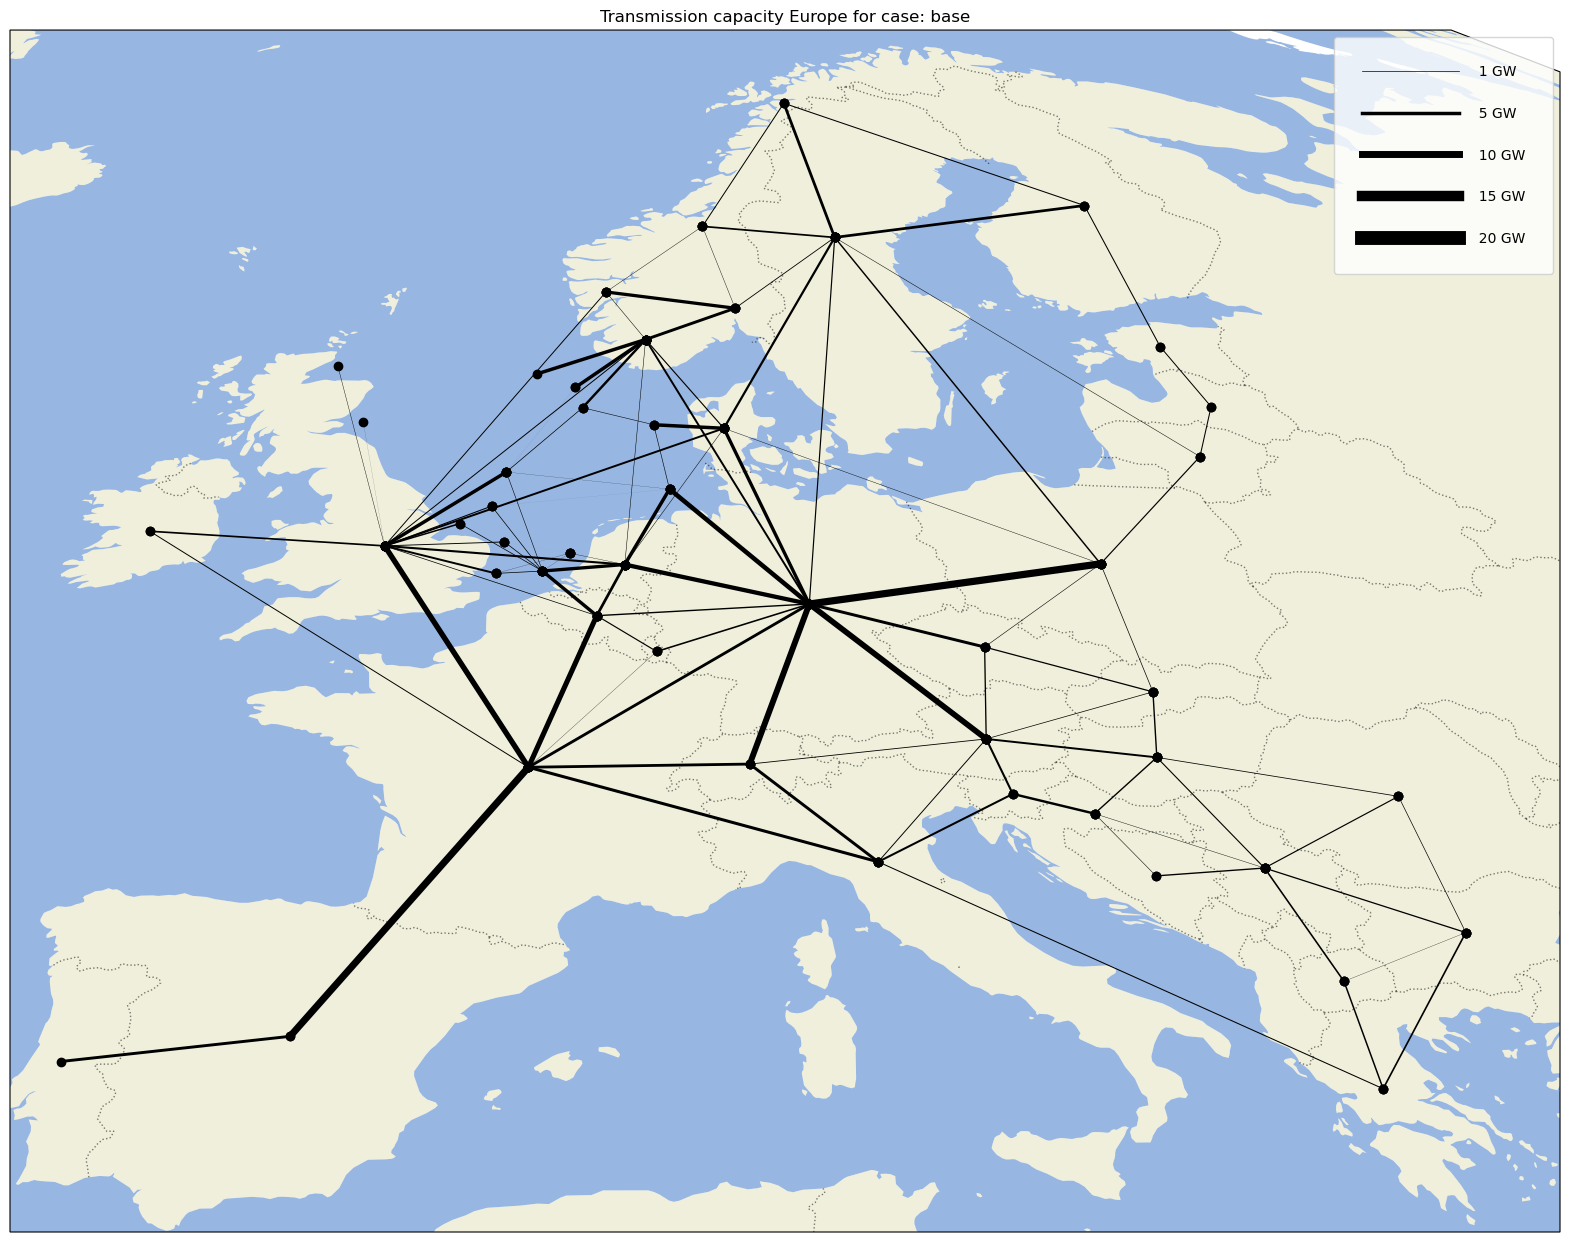

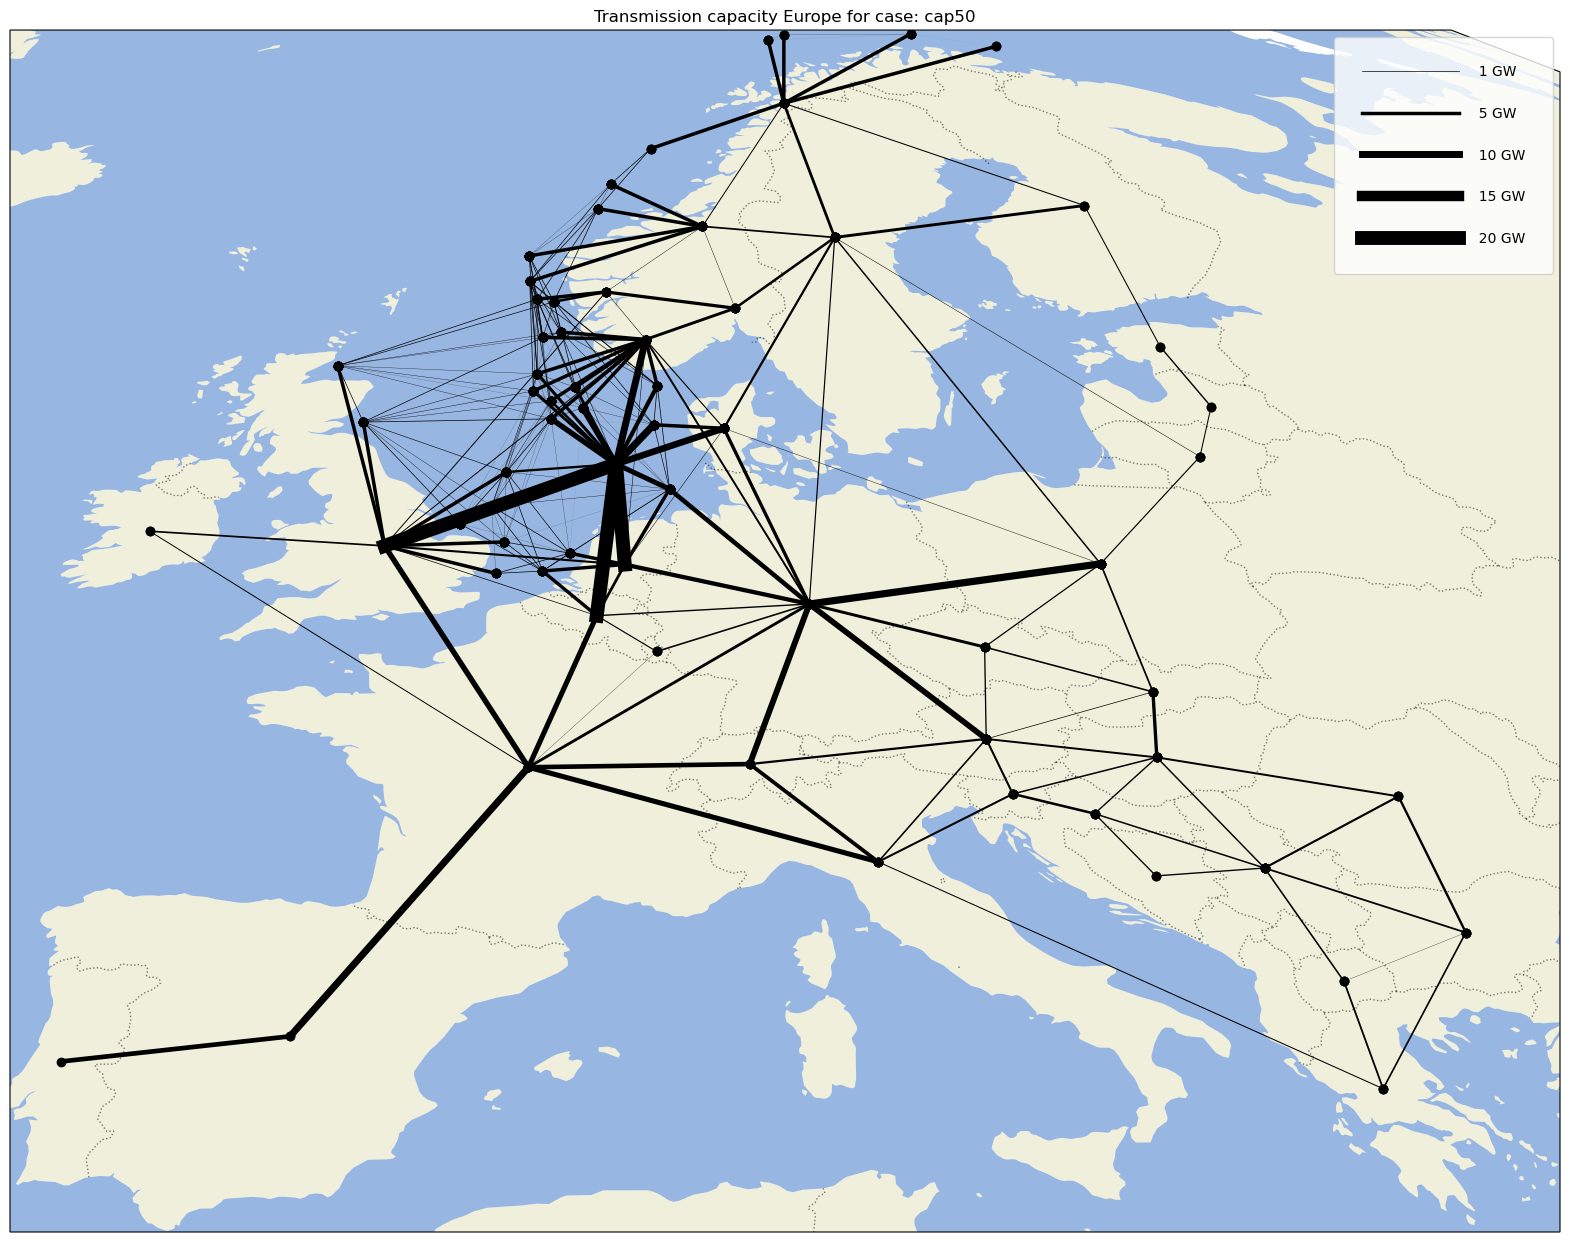

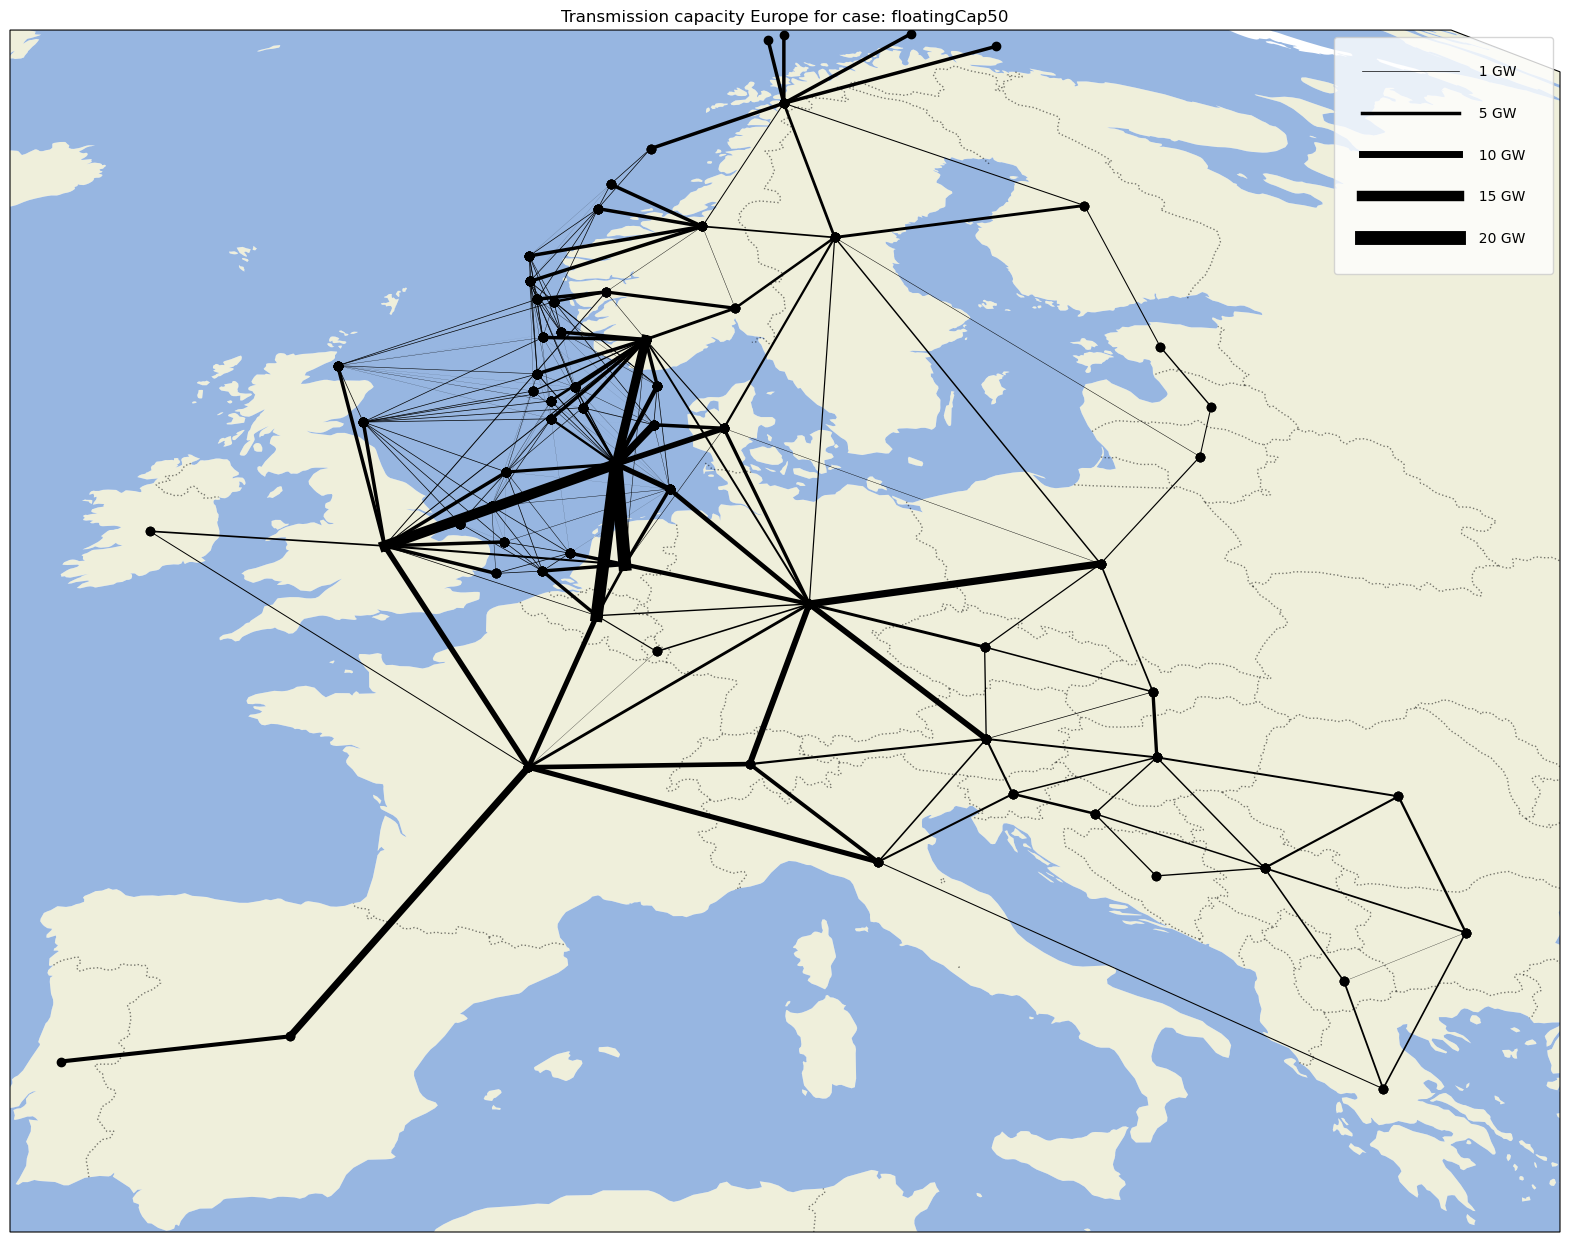

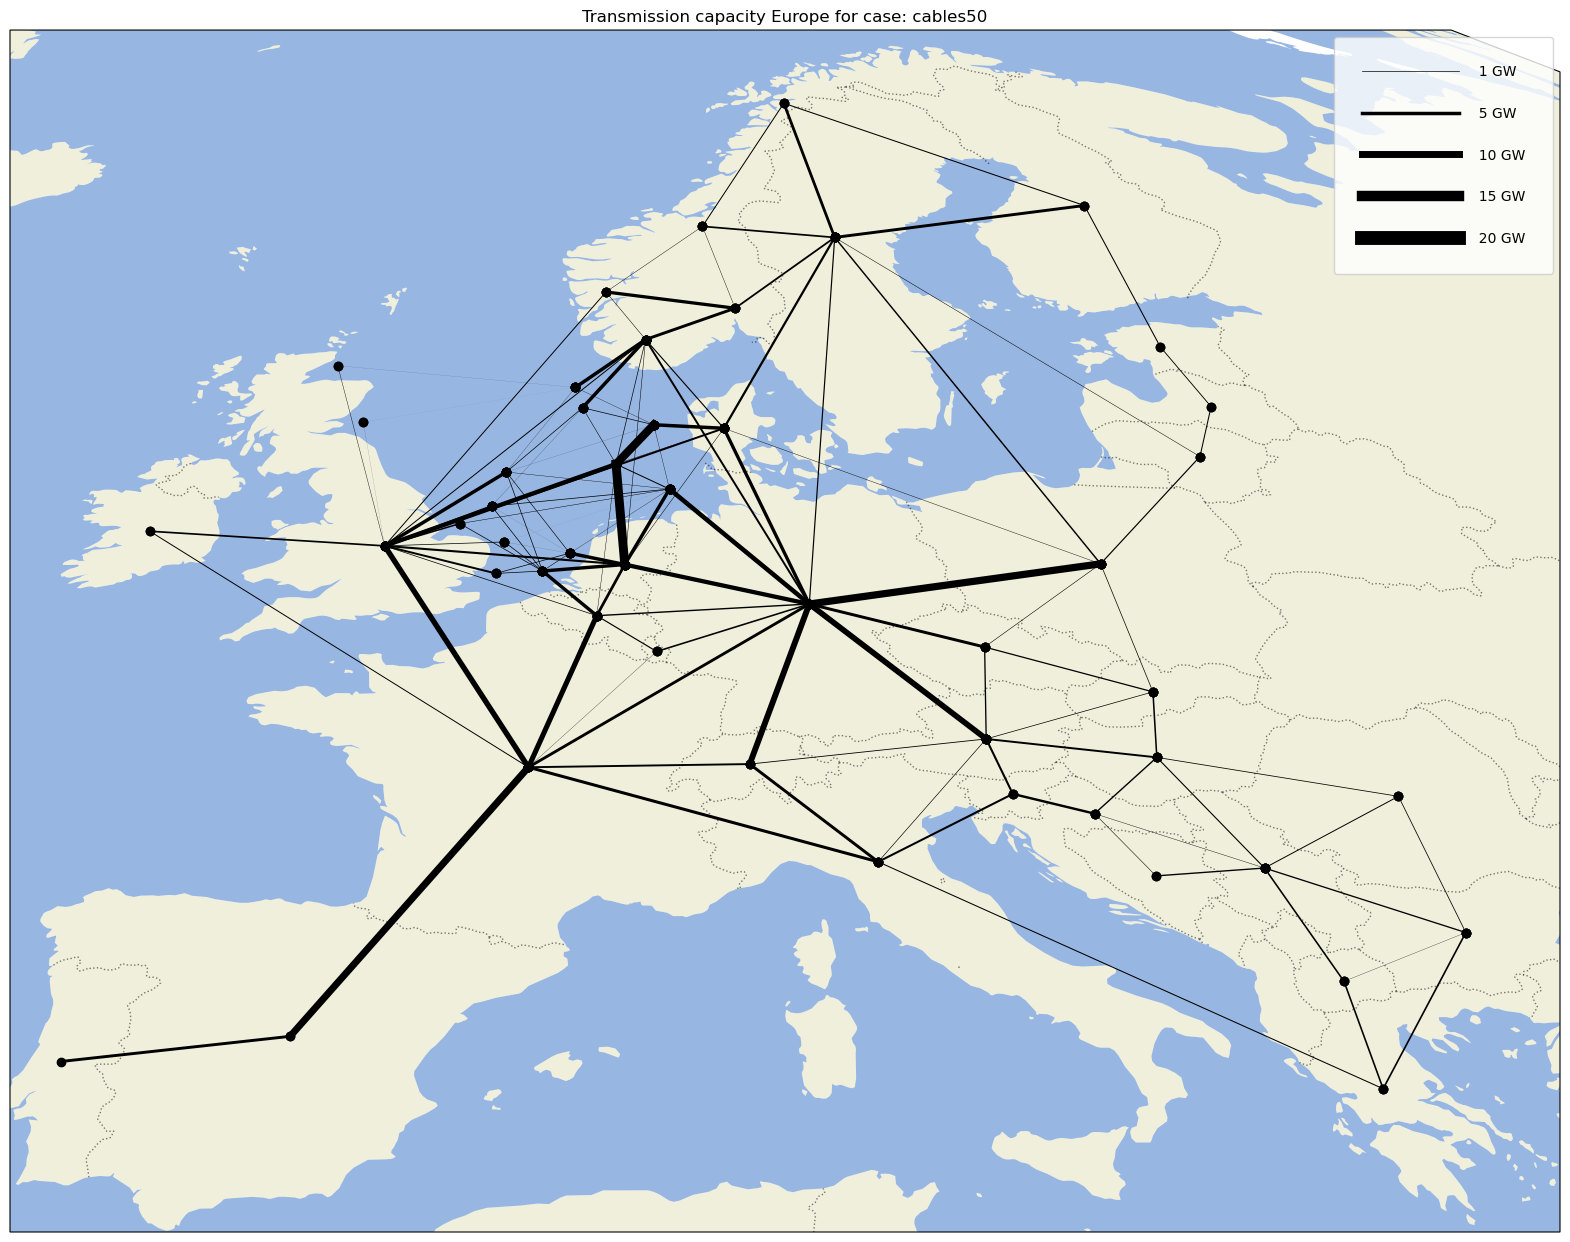

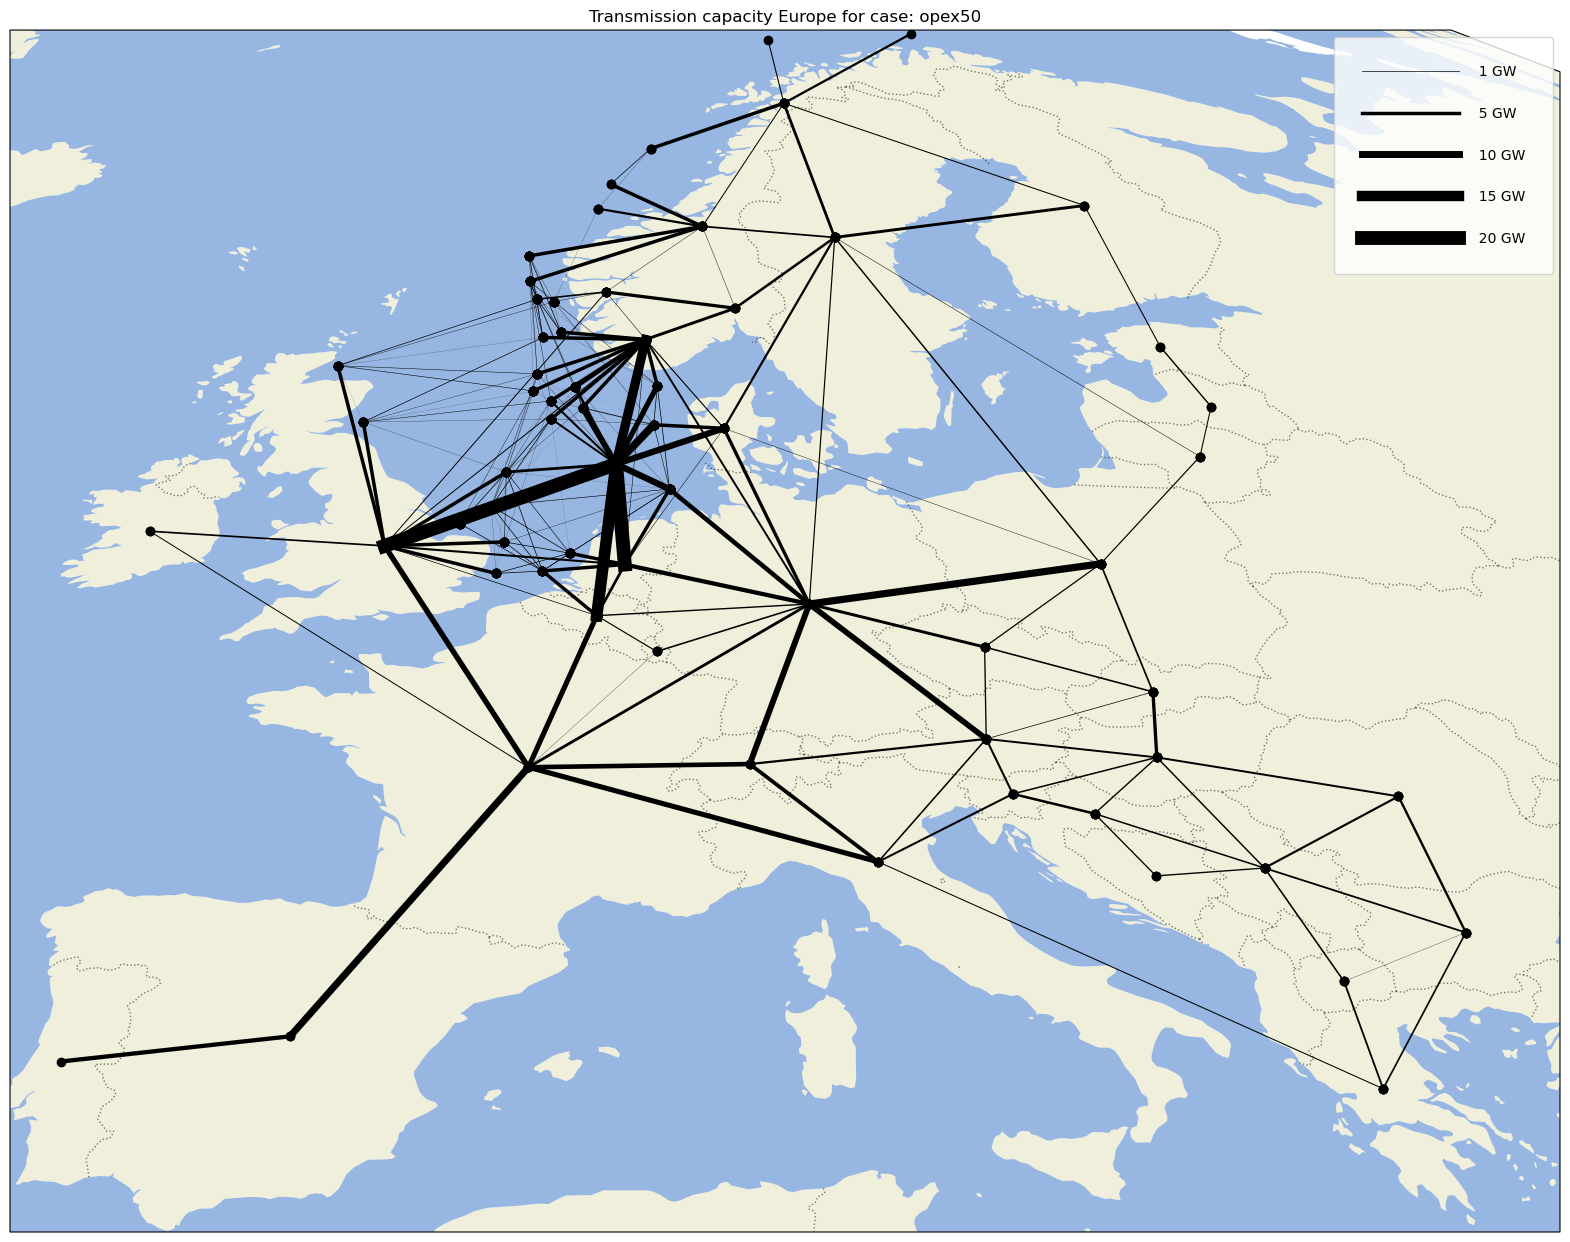

In [3]:
for case, _df in DF_BY_CASES.items():
    plot_transmission_lines_Europe(case, _df)

#### North Sea Plot

In [8]:
def plot_transmission_lines_NS(case, _df):
    # Set 2050 
    df = _df[_df["Period"] == "2050-2055"]

    # Remove 0-connections
    df = df[df["transmissionInstalledCap_MW"] > 1].reset_index(drop=True)
    
    custom_lines = [Line2D([0], [0], color='black', linewidth=0.5),
                Line2D([0], [0], color='black', linewidth=2.5),
                Line2D([0], [0], color='black', linewidth=5),
                Line2D([0], [0], color='black', linewidth=7.5),
                Line2D([0], [0], color='black', linewidth=10)]
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection=ccrs.Orthographic())
    ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), linestyle=':', alpha=.5)
    ax.add_feature(cartopy.feature.LAND.with_scale('50m'))
    ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
    for _, df_row in df.iterrows():
        plt.plot([LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Longitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Longitude"].values[0]],\
                [LATLON[LATLON["Node"] == df_row["BetweenNode"]]["Latitude"].values[0], LATLON[LATLON["Node"] == df_row["AndNode"]]["Latitude"].values[0]],
                    color = 'black',
                    linewidth = df_row["transmissionInstalledCap_MW"]/2000,
                    marker = 'o',
                    transform=ccrs.Geodetic())
    ax.set_extent([-5, 20, 50, 73], crs=ccrs.PlateCarree())
    ax.legend(custom_lines, ['  1 GW', '  5 GW', '  10 GW','  15 GW','  20 GW'], borderpad=2, labelspacing=2, handlelength=7)
    plt.title(f'Transmission capacity North Sea for case: {case}')
    plt.show()

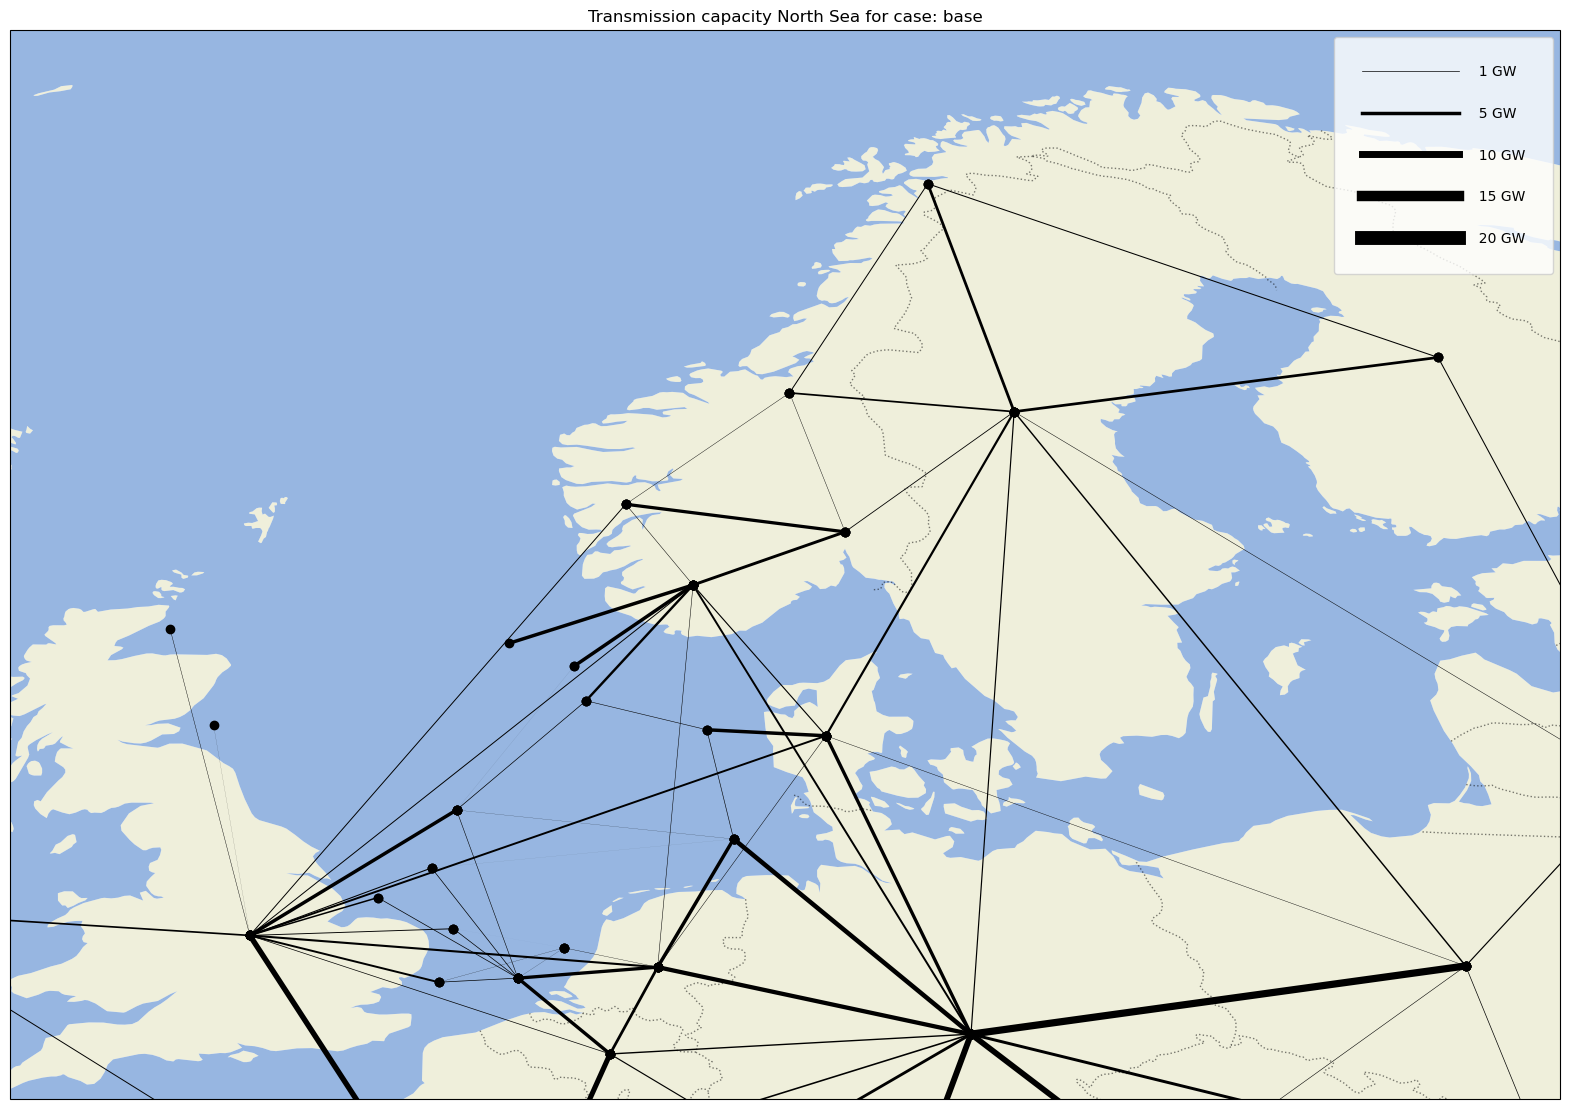

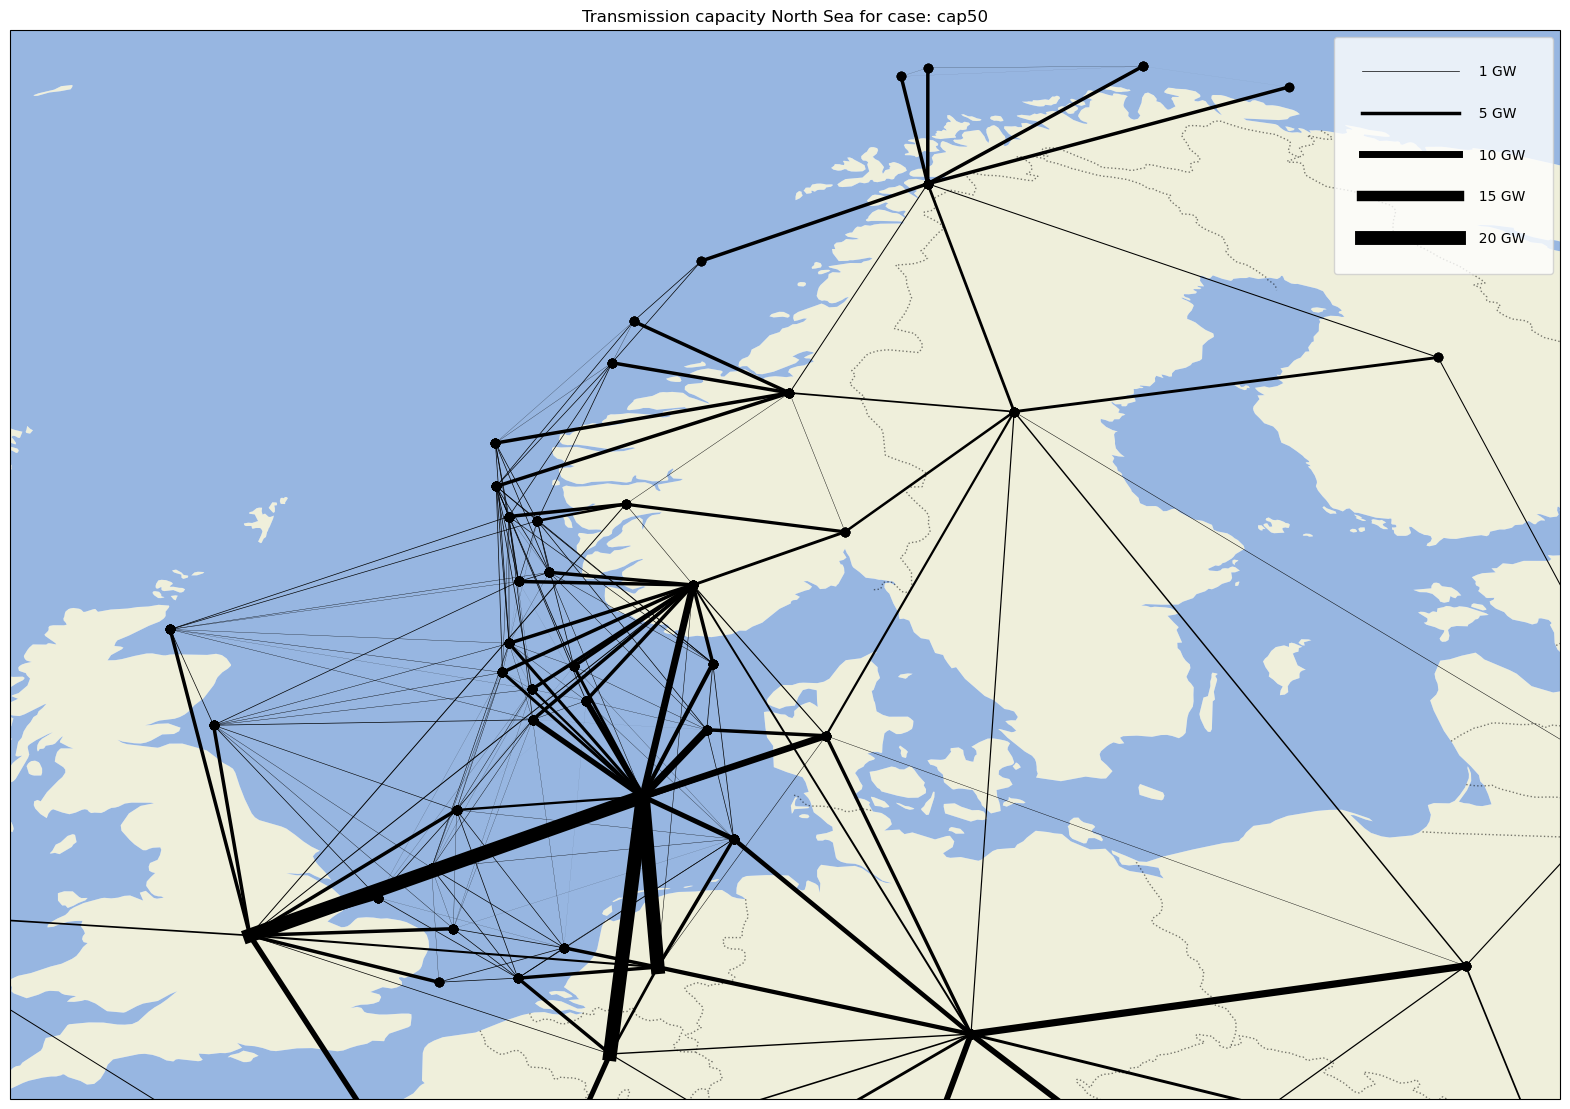

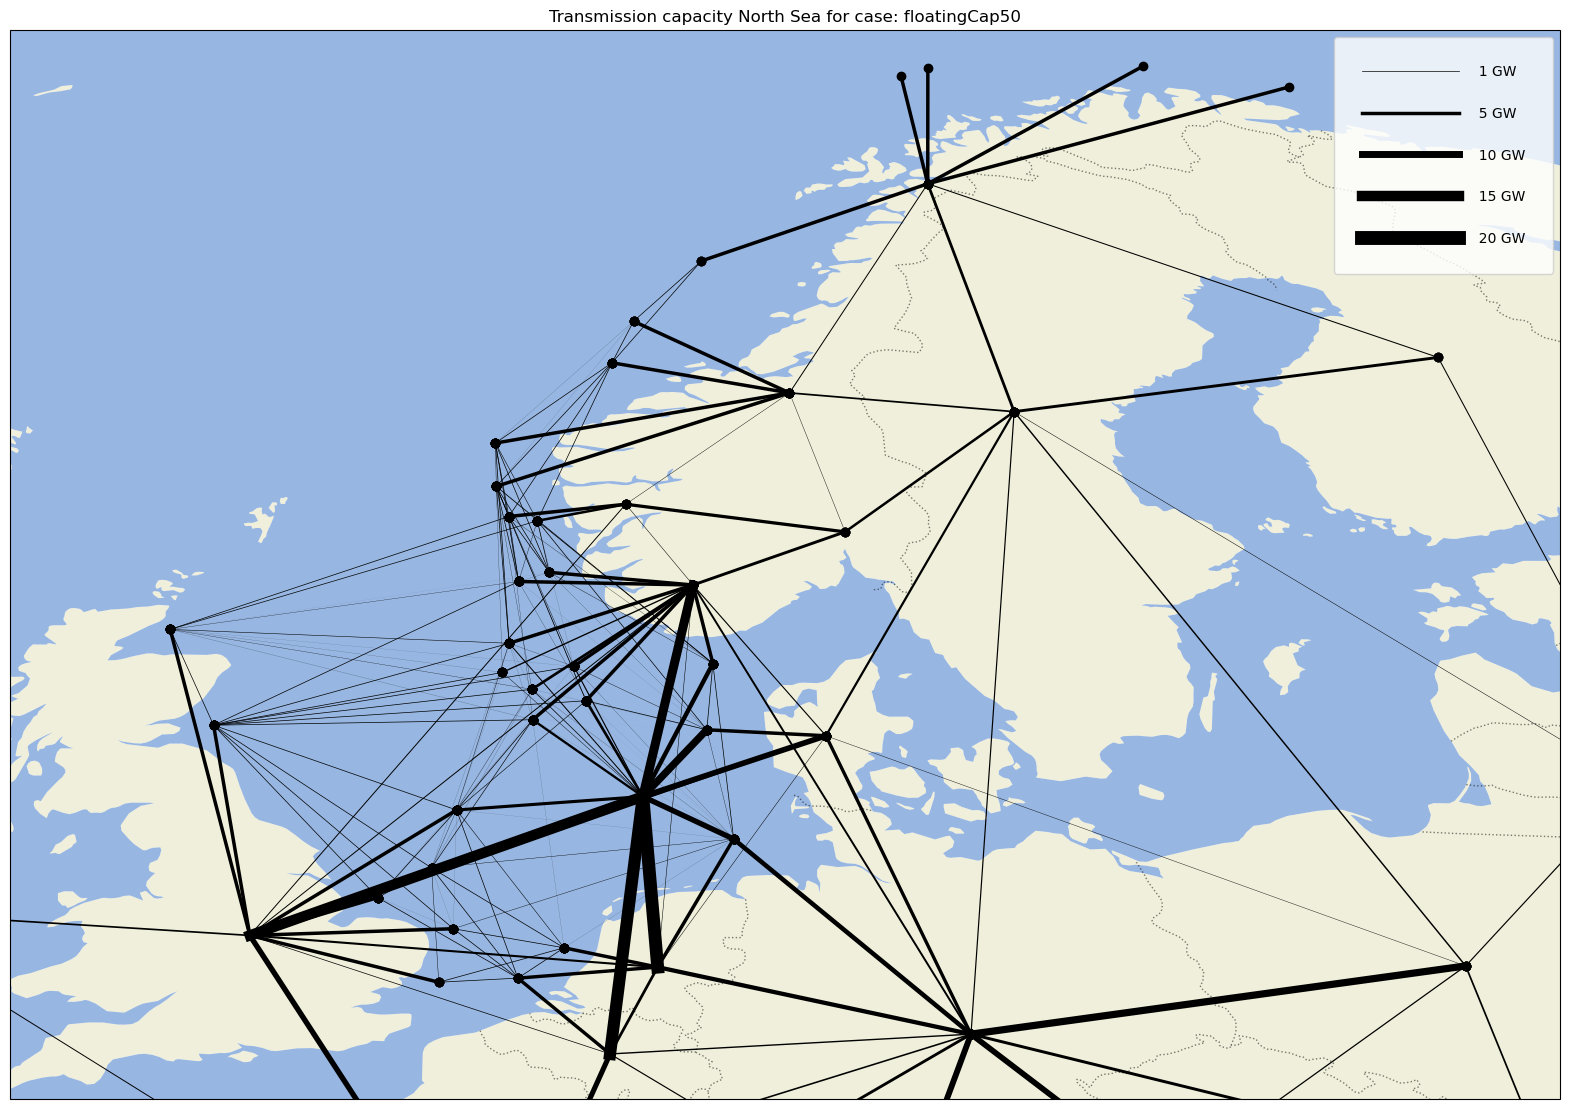

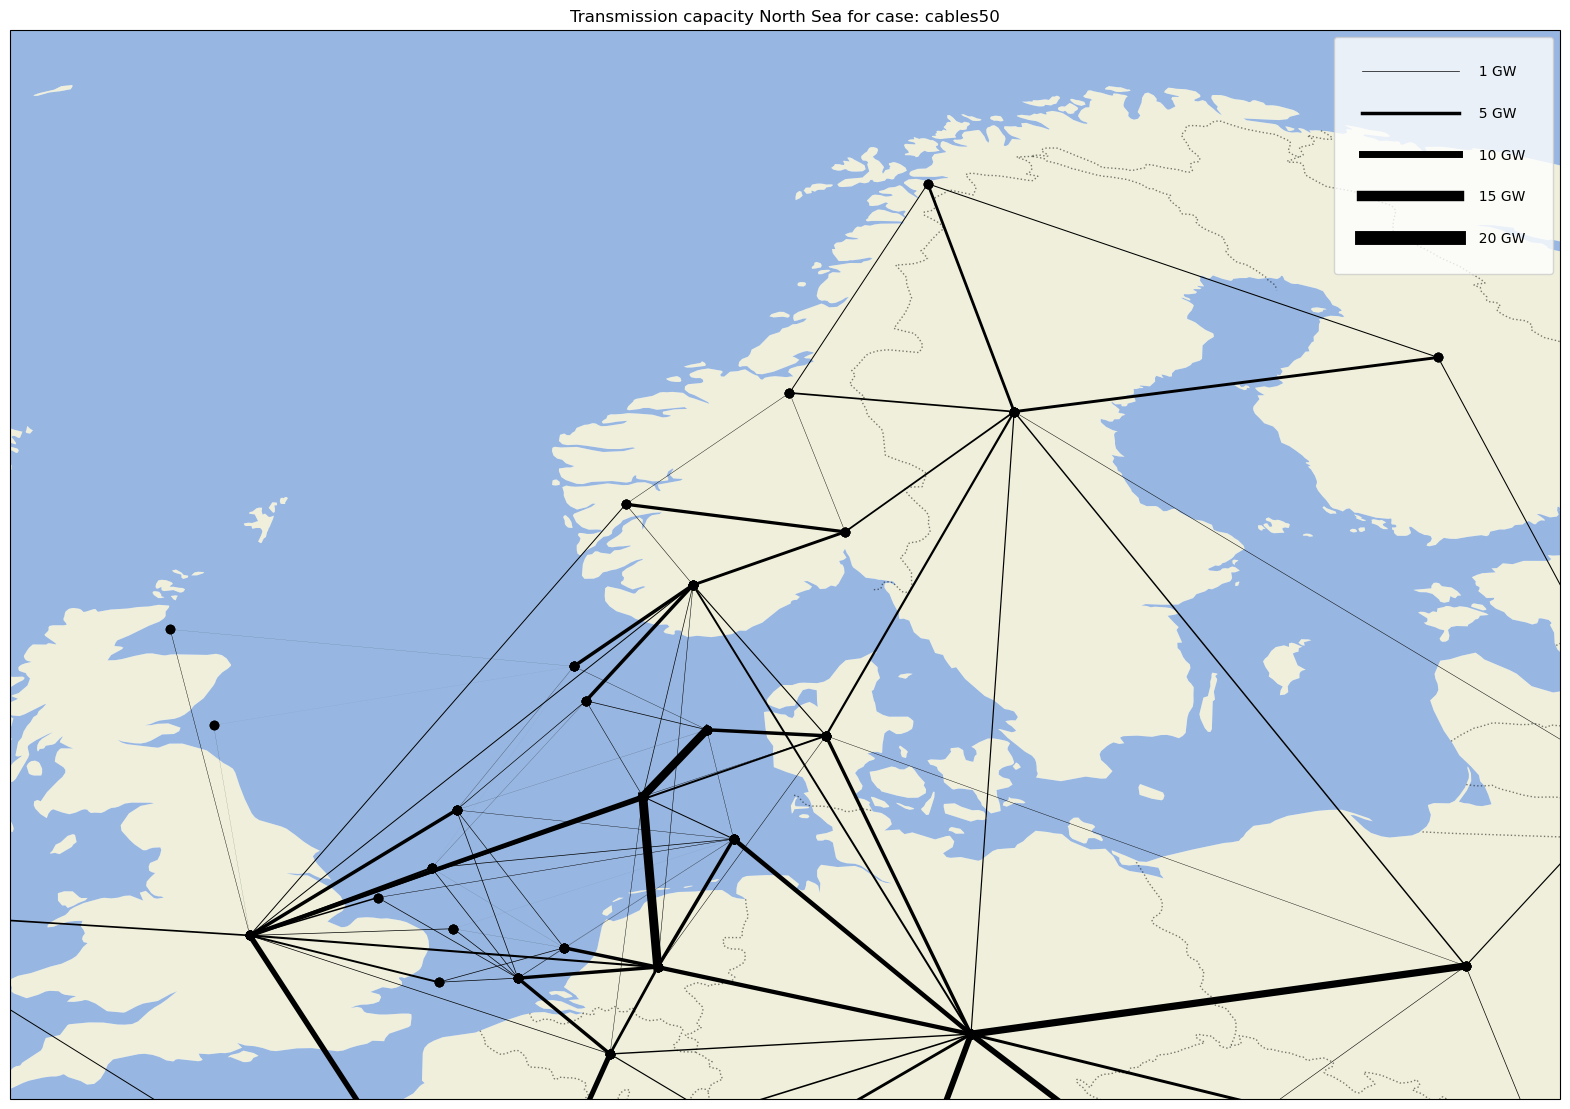

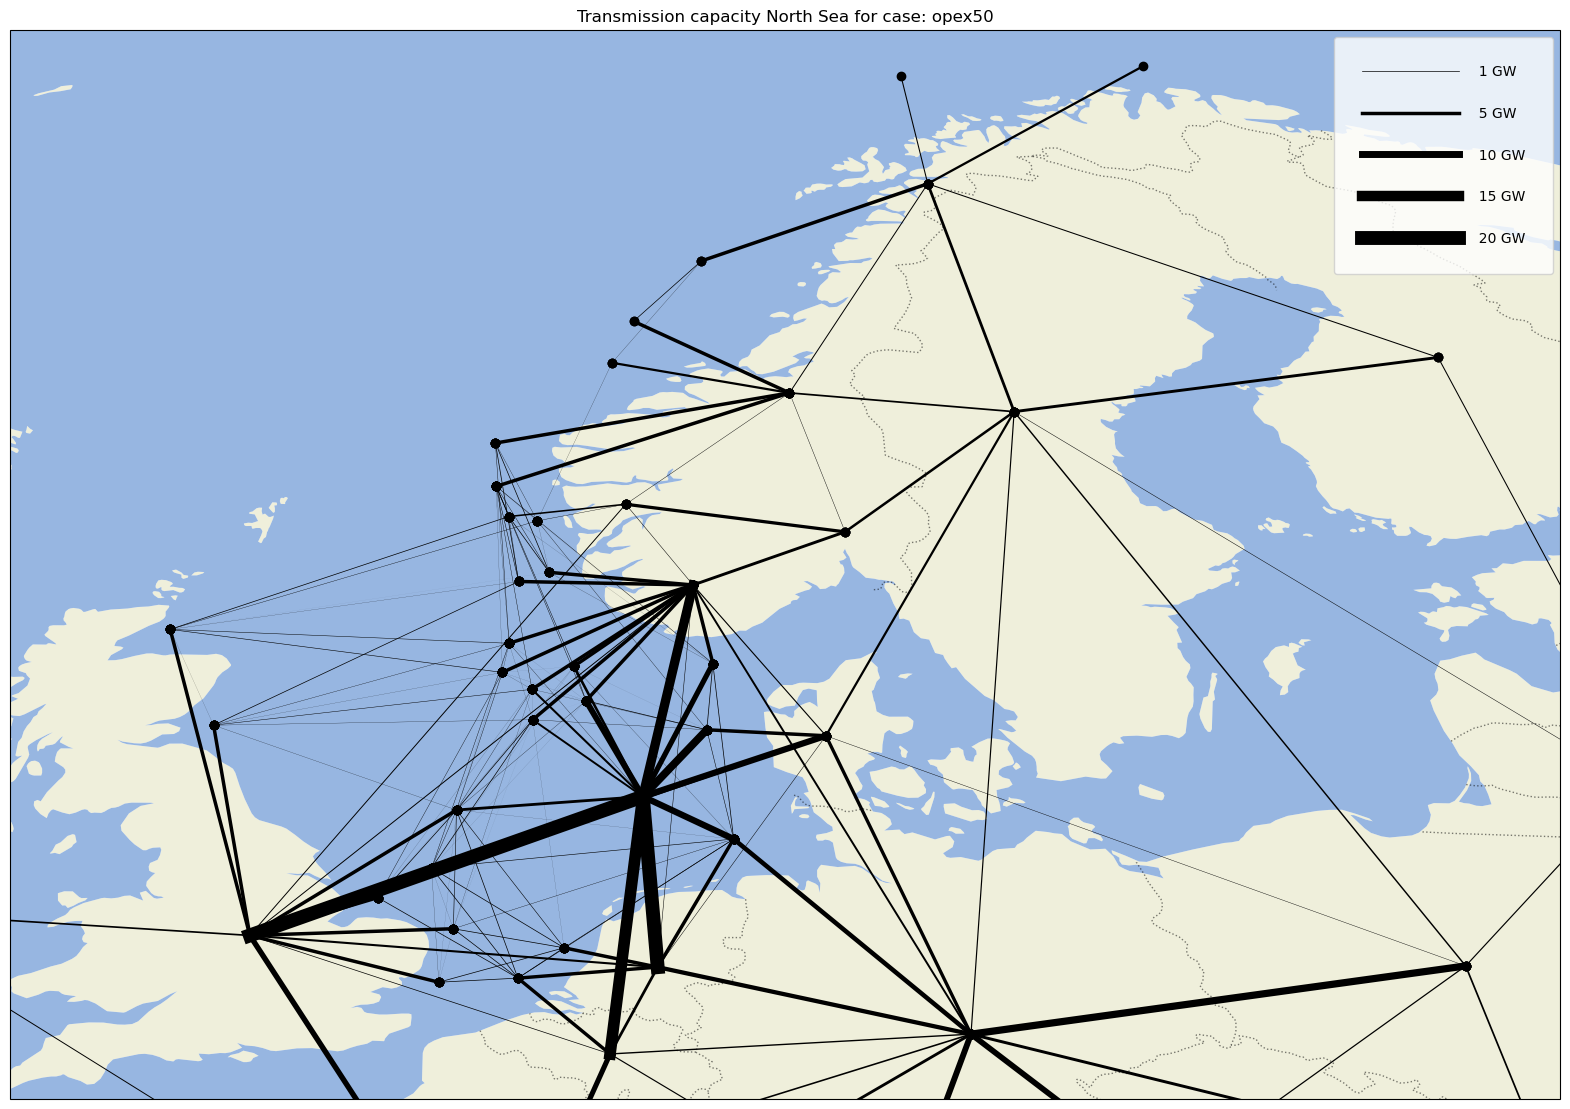

In [9]:
for case, _df in DF_BY_CASES.items():
    plot_transmission_lines_NS(case, _df)